## Artificial Intelligence | 4022 | Dr. Fadaei
## Assignment #03
***
### Amirreza Akbari | 810899045
### 1402/02/09

## Install & Import Libraries

In [58]:
import os
import numpy as np
import warnings
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


## Preprocessing and Feature Extraction

In [54]:
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False)

# Remove the fully connected layers to obtain feature extraction part
feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Function to preprocess and extract features from an image
def extract_features(img_path, model, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()  # Flatten features into a 1D array

# Directory containing the flower images
image_dir = "flower_images"

# List to store extracted features
features_list = []

# Iterate through each image file in the directory
for filename in sorted(os.listdir(image_dir)):
    if filename.endswith(".png"):
        img_path = os.path.join(image_dir, filename)
        features = extract_features(img_path, feature_extractor)
        features_list.append(features)

# Convert features list to numpy array
features_array = np.array(features_list)

# Save extracted features to a file for later use in clustering
np.save("extracted_features.npy", features_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

## Implement Clustering

### K-Means

In [55]:
# Suppress future warning about the default value of `n_init`
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set environment variable to avoid memory leak warning on Windows with MKL
os.environ["OMP_NUM_THREADS"] = "1"

# Load extracted features from .npy file
features_array = np.load("extracted_features.npy")

# Function to perform K-Means clustering
def perform_kmeans(features, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(features)
    return cluster_labels

# Function to find the best value of k using silhouette score
def find_best_k(features, max_k):
    best_k = 2  # Start with a minimum of 2 clusters
    best_score = -1
    for k in range(2, max_k + 1):
        cluster_labels = perform_kmeans(features, k)
        silhouette_avg = silhouette_score(features, cluster_labels)
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_k = k
    return best_k, best_score

# Find the best value of k
max_k = 8  # Maximum value of k to try
best_k, best_score = find_best_k(features_array, max_k)
print("Best value of k found:", best_k)
print("Silhouette Score for best k:", best_score)

# Perform K-Means clustering with the best value of k
kmeans_labels = perform_kmeans(features_array, best_k)

# Print assigned cluster label for each image
print("Image Cluster Labels (K-Means):")
for i, label in enumerate(kmeans_labels):
    print(f"Image {i+1}: Cluster {label}")


C:\Users\Amirreza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Amirreza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Amirreza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Amirreza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory le

Best value of k found: 2
Silhouette Score for best k: 0.11673043


C:\Users\Amirreza\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Image Cluster Labels (K-Means):
Image 1: Cluster 0
Image 2: Cluster 0
Image 3: Cluster 1
Image 4: Cluster 0
Image 5: Cluster 0
Image 6: Cluster 0
Image 7: Cluster 0
Image 8: Cluster 0
Image 9: Cluster 0
Image 10: Cluster 0
Image 11: Cluster 0
Image 12: Cluster 0
Image 13: Cluster 0
Image 14: Cluster 0
Image 15: Cluster 1
Image 16: Cluster 0
Image 17: Cluster 0
Image 18: Cluster 0
Image 19: Cluster 0
Image 20: Cluster 0
Image 21: Cluster 1
Image 22: Cluster 1
Image 23: Cluster 0
Image 24: Cluster 1
Image 25: Cluster 0
Image 26: Cluster 0
Image 27: Cluster 1
Image 28: Cluster 0
Image 29: Cluster 0
Image 30: Cluster 0
Image 31: Cluster 0
Image 32: Cluster 0
Image 33: Cluster 0
Image 34: Cluster 0
Image 35: Cluster 0
Image 36: Cluster 0
Image 37: Cluster 0
Image 38: Cluster 0
Image 39: Cluster 1
Image 40: Cluster 0
Image 41: Cluster 0
Image 42: Cluster 0
Image 43: Cluster 0
Image 44: Cluster 0
Image 45: Cluster 0
Image 46: Cluster 1
Image 47: Cluster 0
Image 48: Cluster 0
Image 49: Cluster

### DBSCAN

Optimal k value: 10
Optimal eps value: 1657.424302430243
Chosen min_samples value: 8
Silhouette Score: 0.1466


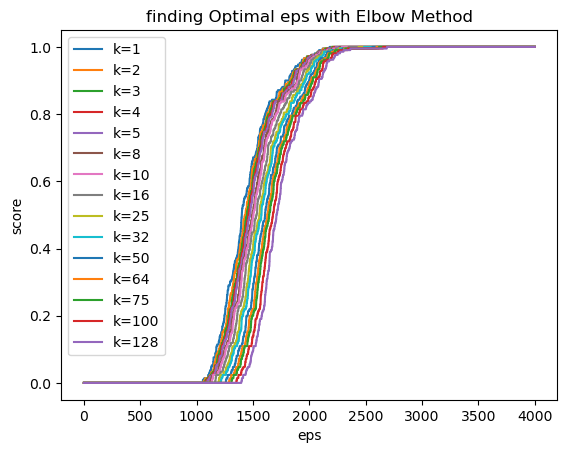

Image Cluster Labels (DBSCAN):
Image 1: Cluster 0
Image 2: Cluster 0
Image 3: Cluster 0
Image 4: Noise
Image 5: Cluster 0
Image 6: Cluster 0
Image 7: Cluster 0
Image 8: Cluster 0
Image 9: Cluster 0
Image 10: Cluster 0
Image 11: Cluster 0
Image 12: Cluster 0
Image 13: Cluster 0
Image 14: Cluster 0
Image 15: Cluster 0
Image 16: Cluster 0
Image 17: Cluster 0
Image 18: Cluster 0
Image 19: Cluster 0
Image 20: Cluster 0
Image 21: Cluster 0
Image 22: Cluster 0
Image 23: Cluster 0
Image 24: Cluster 0
Image 25: Cluster 0
Image 26: Noise
Image 27: Cluster 0
Image 28: Cluster 0
Image 29: Cluster 0
Image 30: Noise
Image 31: Cluster 0
Image 32: Cluster 0
Image 33: Cluster 0
Image 34: Cluster 0
Image 35: Noise
Image 36: Cluster 0
Image 37: Cluster 0
Image 38: Cluster 0
Image 39: Cluster 0
Image 40: Cluster 0
Image 41: Cluster 0
Image 42: Cluster 0
Image 43: Cluster 0
Image 44: Cluster 0
Image 45: Cluster 0
Image 46: Cluster 0
Image 47: Cluster 0
Image 48: Cluster 0
Image 49: Cluster 0
Image 50: Clus

In [57]:
# Load extracted features from .npy file
features_array = np.load("extracted_features.npy")

# Function to find the optimal eps using the elbow method
def find_optimal_eps(k_values, eps_candidates, features):
    elbow_scores = []
    for k in k_values:
        knn_distances = calculate_knn_distances(features, k)
        knn_distances = np.sort(knn_distances)
        elbow_scores.append([])

        for eps in eps_candidates:
            score = np.mean(knn_distances <= eps)
            elbow_scores[-1].append(score)
        plt.plot(eps_candidates, elbow_scores[-1], label=f"k={k}")


    elbow_indices = [np.argmax(np.diff(scores)) for scores in elbow_scores]
    optimal_k_index = np.argmax([scores[idx] for scores, idx in zip(elbow_scores, elbow_indices)])
    optimal_eps_index = elbow_indices[optimal_k_index]
    return k_values[optimal_k_index], eps_candidates[optimal_eps_index]

# Function to calculate the average distances to the k nearest neighbors
def calculate_knn_distances(features, k):
    distances = []
    for i, point in enumerate(features):
        distances.append(np.mean(np.sort(np.linalg.norm(features - point, axis=1))[1:k+1]))
    return np.array(distances)

# Function to find the optimal min_samples using silhouette score
def find_optimal_min_samples(features, eps_range, min_samples_range):
    best_min_samples = 1
    best_silhouette_avg = 0
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps_range, min_samples=min_samples)
        dbscan.fit(features)
        silhouette_avg = silhouette_score(features, dbscan.labels_)
        if silhouette_avg > best_silhouette_avg:
            best_silhouette_avg = silhouette_avg
            best_min_samples = min_samples
    return best_min_samples, best_silhouette_avg

# Elbow method parameters
k_values = [1, 2, 3, 4, 5, 8, 10, 16, 25, 32, 50, 64, 75, 100, 128]
eps_candidates = np.linspace(0.1, 4000, 10000)

# Find optimal eps using elbow method
optimal_k, optimal_eps = find_optimal_eps(k_values, eps_candidates, features_array)

print(f"Optimal k value: {optimal_k}")
print(f"Optimal eps value: {optimal_eps}")

# Range for min_samples parameter
min_samples_range = range(1, 20)

# Find optimal min_samples using silhouette score
optimal_min_samples, optimal_silhouette_score = find_optimal_min_samples(features_array, optimal_eps, min_samples_range)

print(f"Chosen min_samples value: {optimal_min_samples}")
print(f"Silhouette Score: {optimal_silhouette_score:.4f}")

# Perform DBSCAN clustering with the best parameters
dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan.fit(features_array)

# Visualization (optional)
plt.xlabel("eps")
plt.ylabel("score")
plt.title("finding Optimal eps with Elbow Method")
plt.legend()
plt.show()

# Print cluster labels for each image
print("Image Cluster Labels (DBSCAN):")
for i, label in enumerate(dbscan.labels_):
    print(f"Image {i+1}: {'Cluster ' + str(label) if label != -1 else 'Noise'}")
